In [61]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd



In [62]:
#df_CDFI = pd.read_csv(r"C:\Users\saust\OneDrive - Sasol\1 Project rC4\Jupyter Notebooks\Report 10-19-23\df_AlConCD554.csv")
# F1 is used to compare before and after
df_CDFI1 = pd.read_csv(r"C:\Users\saust\OneDrive\Desktop\CodeSpace DLs\102423\Project rC4\5 Engineered Features\3 - EF - Feature Selection\df_CDFS.csv")


# df_CDFI = pd.read_csv('/workspaces/codespaces-jupyter/Final Machine/Interpolated LIMS/df_CDOH.csv')


In [63]:
# Set max columns to display
pd.set_option('display.max_columns', None)

In [64]:
df_CDFI1.describe()

,Butanol,425 %Al,DI55102,TC55552,DI55152,FC55569,FC55576,FC42428,AYC55580,FFC55553,TI55023,TI55017,LC55557,FC55003,DI55580,LC55555,FC55009,FC55555,LC55553,TI55021,FFC55555,FYC55553,FC55102,TC55553,TC55555,Decanol
count,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,5.669200e+04,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000
mean,10.159097,6.102568,0.929183,167.848708,0.948213,6542.683482,423.616848,34949.282507,11.190763,0.983235,218.923414,186.704144,69.335227,5943.587725,0.998448,59.583652,8.642095e+02,27838.228893,63.743198,223.571121,0.774375,35311.748813,44454.232553,182.968327,181.033535,2.783139
std,10.766912,0.307167,0.066439,15.014702,0.043248,380.329468,260.435270,5665.289174,4.140405,0.056070,4.063504,9.778964,3.271572,836.963231,0.044181,10.709861,5.951287e+02,3535.683915,6.403442,9.366356,0.021944,4632.175030,6565.359850,27.965747,1.495460,1.600426
min,0.010000,4.573810,0.794535,119.869000,0.820425,5096.080000,0.000548,14573.800000,0.000862,0.265390,206.472000,159.702000,59.038000,2925.430000,0.860904,27.970000,3.150000e-18,14214.900000,43.548000,206.365000,0.694477,17321.200000,20039.100000,110.534000,175.746000,0.000976
25%,3.725195,5.969493,0.889793,156.235000,0.917749,6295.522500,244.604000,31670.025000,9.382740,0.959998,215.731000,179.370000,66.227375,5425.580000,0.967603,49.938100,4.091148e+02,26770.325000,61.246825,217.963000,0.759903,33117.150000,40968.975000,162.691750,179.971000,1.493330
50%,5.920780,6.120565,0.938533,170.625000,0.942326,6529.010000,379.134000,37037.650000,10.709550,0.988710,218.255500,185.770500,69.966300,5963.340000,0.995945,61.884700,8.416325e+02,28947.000000,65.277550,221.217000,0.778141,36832.650000,45941.200000,177.601500,180.142000,2.560000
75%,11.642100,6.267622,0.979955,179.313000,0.974824,6767.337500,617.744000,39151.750000,12.928750,1.010652,221.765000,193.388250,71.768800,6506.837500,1.027960,68.106400,1.317453e+03,30036.300000,67.964225,225.275000,0.789695,38552.225000,48822.325000,202.014250,182.027000,3.863330
max,60.346700,7.571230,1.068230,207.426000,1.065410,8014.950000,1206.820000,49372.900000,23.835600,1.475490,232.208000,212.051000,79.508200,8973.580000,1.125220,85.261600,2.655410e+03,34638.100000,82.753500,260.685000,0.853283,50427.700000,62848.200000,261.360000,186.453000,7.923330


In [65]:
column_counts = df_CDFI1.columns.value_counts()
total_counts = column_counts.sum()
print(total_counts)

27


In [66]:

# List of columns to exclude to run XGboost feature selection
exclude_columns = ["Date", "Decanol"]

# Temporarily save the excluded columns
temp_exclude = df_CDFI1[exclude_columns]

# Create a new DataFrame without the excluded columnsd
df_CDFI = df_CDFI1.drop(columns=exclude_columns)



In [67]:
# # List of columns to exclude
# columns_to_exclude = [
#     'FC52018_1dAvg', 'FC55003_1dAvg', 'FC55009_1dAvg', 'FC55102_1dAvg',
#     'FC55152_1dAvg', 'FC55552_1dAvg', 'FC55569_1dAvg', 'FC55576_1dAvg',
#     'FFC55553_1dAvg', 'FFC55555_1dAvg', 'FYC55553_1dAvg', 'LC52572_1dAvg',
#     'LC55553_1dAvg', 'LC55555_1dAvg', 'LC55557_1dAvg', 'LC55568_1dAvg',
#     'LC90366_1dAvg', 'LC90368_1dAvg', 'TC52015_1dAvg', 'TC55552_1dAvg',
#     'TC55553_1dAvg', 'TC55555_1dAvg', 'TC55566_1dAvg', 'TI40050_1dAvg',
#     'PI55004_1dAvg', 'PI55020_1dAvg', 'TI52014_1dAvg', 'VI52558B_1dAvg',
#     'PI55004', 'PI55020', 'PI55560', 'TI40050', 'FC55009'
# ]

# # Filter columns based on exclusion list
# columns_to_include = [col for col in df_CDFI_noStr.columns if col not in columns_to_exclude]

# # Create a new DataFrame with included columns
# df_CDFI_noAvg = df_CDFI_noStr[columns_to_include]

# # Print descriptive statistics for df_CDFI
# print(df_CDFI_noAvg.describe())



In [68]:
# print(df_CDFI_noAvg.columns)

# # Save DataFrame to CSV file in the same directory as the Jupyter Notebook
# df_CDFI_noAvg.to_csv('df_CDFI_noAvg.csv', index=False)


In [69]:
X = df_CDFI.drop('Butanol', axis=1)  # Replace 'target' with the actual name of your target column
y = df_CDFI['Butanol']  # Replace 'target' with the actual name of your target column


In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [71]:
model = xgb.XGBRegressor(objective ='reg:squarederror')
model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [72]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")



Mean Squared Error: 31.688942596874185


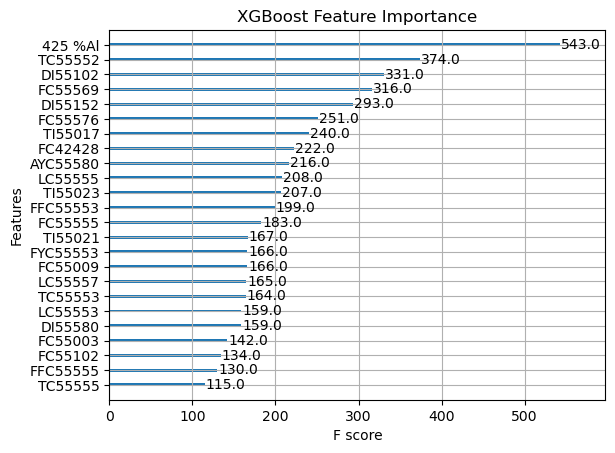

In [73]:
xgb.plot_importance(model)
plt.title("XGBoost Feature Importance")
plt.show()


In [74]:

# Extract feature importances from the model
feature_importances = model.get_booster().get_score(importance_type="weight")

# Convert the dictionary to a DataFrame and sort by importance
df_importance = pd.DataFrame(list(feature_importances.items()), columns=['Feature', 'Importance']).sort_values(by='Importance', ascending=False)



df_importance.to_csv('FScore_on_Butanol_320.csv', index=False)

In [75]:
num_columns = df_importance.shape[0]
print("Number of rows:", num_columns)

Number of rows: 24


In [76]:
# Display the DataFrame
df_importance

,Feature,Importance
0,425 %Al,543.0
2,TC55552,374.0
1,DI55102,331.0
4,FC55569,316.0
3,DI55152,293.0
5,FC55576,251.0
10,TI55017,240.0
6,FC42428,222.0
7,AYC55580,216.0
14,LC55555,208.0


In [77]:
# Extract the feature names you want to keep from df_importance
features_to_keep = df_importance['Feature'].tolist()

# Filter df_CDFI using these features
df_CDFI = df_CDFI[features_to_keep]

# Add back the excluded columns to df_CDFI
df_CDFI = pd.concat([y, df_CDFI, temp_exclude], axis=1)

In [78]:
df_CDFI.describe()

,Butanol,425 %Al,TC55552,DI55102,FC55569,DI55152,FC55576,TI55017,FC42428,AYC55580,LC55555,TI55023,FFC55553,FC55555,TI55021,FYC55553,FC55009,LC55557,TC55553,DI55580,LC55553,FC55003,FC55102,FFC55555,TC55555,Decanol
count,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,5.669200e+04,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000
mean,10.159097,6.102568,167.848708,0.929183,6542.683482,0.948213,423.616848,186.704144,34949.282507,11.190763,59.583652,218.923414,0.983235,27838.228893,223.571121,35311.748813,8.642095e+02,69.335227,182.968327,0.998448,63.743198,5943.587725,44454.232553,0.774375,181.033535,2.783139
std,10.766912,0.307167,15.014702,0.066439,380.329468,0.043248,260.435270,9.778964,5665.289174,4.140405,10.709861,4.063504,0.056070,3535.683915,9.366356,4632.175030,5.951287e+02,3.271572,27.965747,0.044181,6.403442,836.963231,6565.359850,0.021944,1.495460,1.600426
min,0.010000,4.573810,119.869000,0.794535,5096.080000,0.820425,0.000548,159.702000,14573.800000,0.000862,27.970000,206.472000,0.265390,14214.900000,206.365000,17321.200000,3.150000e-18,59.038000,110.534000,0.860904,43.548000,2925.430000,20039.100000,0.694477,175.746000,0.000976
25%,3.725195,5.969493,156.235000,0.889793,6295.522500,0.917749,244.604000,179.370000,31670.025000,9.382740,49.938100,215.731000,0.959998,26770.325000,217.963000,33117.150000,4.091148e+02,66.227375,162.691750,0.967603,61.246825,5425.580000,40968.975000,0.759903,179.971000,1.493330
50%,5.920780,6.120565,170.625000,0.938533,6529.010000,0.942326,379.134000,185.770500,37037.650000,10.709550,61.884700,218.255500,0.988710,28947.000000,221.217000,36832.650000,8.416325e+02,69.966300,177.601500,0.995945,65.277550,5963.340000,45941.200000,0.778141,180.142000,2.560000
75%,11.642100,6.267622,179.313000,0.979955,6767.337500,0.974824,617.744000,193.388250,39151.750000,12.928750,68.106400,221.765000,1.010652,30036.300000,225.275000,38552.225000,1.317453e+03,71.768800,202.014250,1.027960,67.964225,6506.837500,48822.325000,0.789695,182.027000,3.863330
max,60.346700,7.571230,207.426000,1.068230,8014.950000,1.065410,1206.820000,212.051000,49372.900000,23.835600,85.261600,232.208000,1.475490,34638.100000,260.685000,50427.700000,2.655410e+03,79.508200,261.360000,1.125220,82.753500,8973.580000,62848.200000,0.853283,186.453000,7.923330


In [79]:

# If you want to save df_CDFI to a .csv file:
df_CDFI.to_csv('df_CDFII.csv', index=False)

In [80]:
column_counts = df_CDFI.columns.value_counts()
total_counts = column_counts.sum()
print(total_counts)


27
